# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Datasets

In [2]:
train_df =  pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df  =  pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# EDA

In [4]:
delete_list = ["PoolQC" , "MiscFeature","Alley","Fence","FireplaceQu" , "Id"]
train_df.drop(delete_list , inplace = True , axis = 1)
print(train_df.isnull().sum().sort_values(ascending=False).head(25))

MasVnrType      872
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtQual         37
BsmtCond         37
MasVnrArea        8
Electrical        1
LandSlope         0
Neighborhood      0
LotShape          0
Street            0
LotArea           0
MSZoning          0
MSSubClass        0
LotConfig         0
Utilities         0
LandContour       0
YearRemodAdd      0
dtype: int64


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<Axes: >

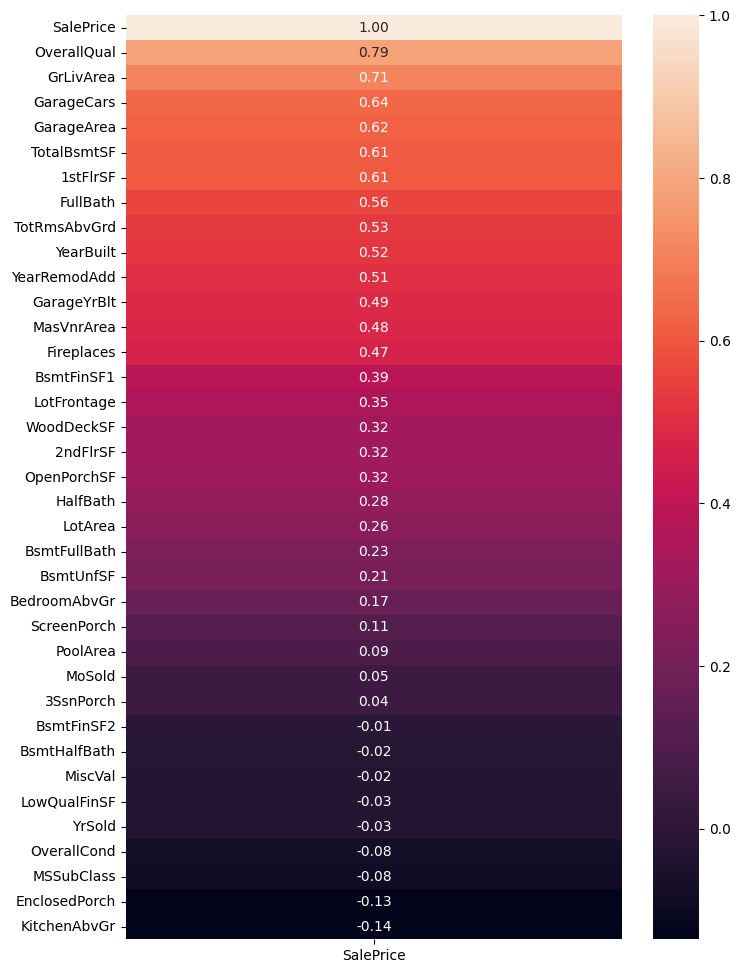

In [6]:
numeric_df = train_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
price = corr_matrix["SalePrice"].sort_values(ascending=False).to_frame()

plt.figure(figsize=(8,12))
sns.heatmap(price , annot=True , fmt=".2f")

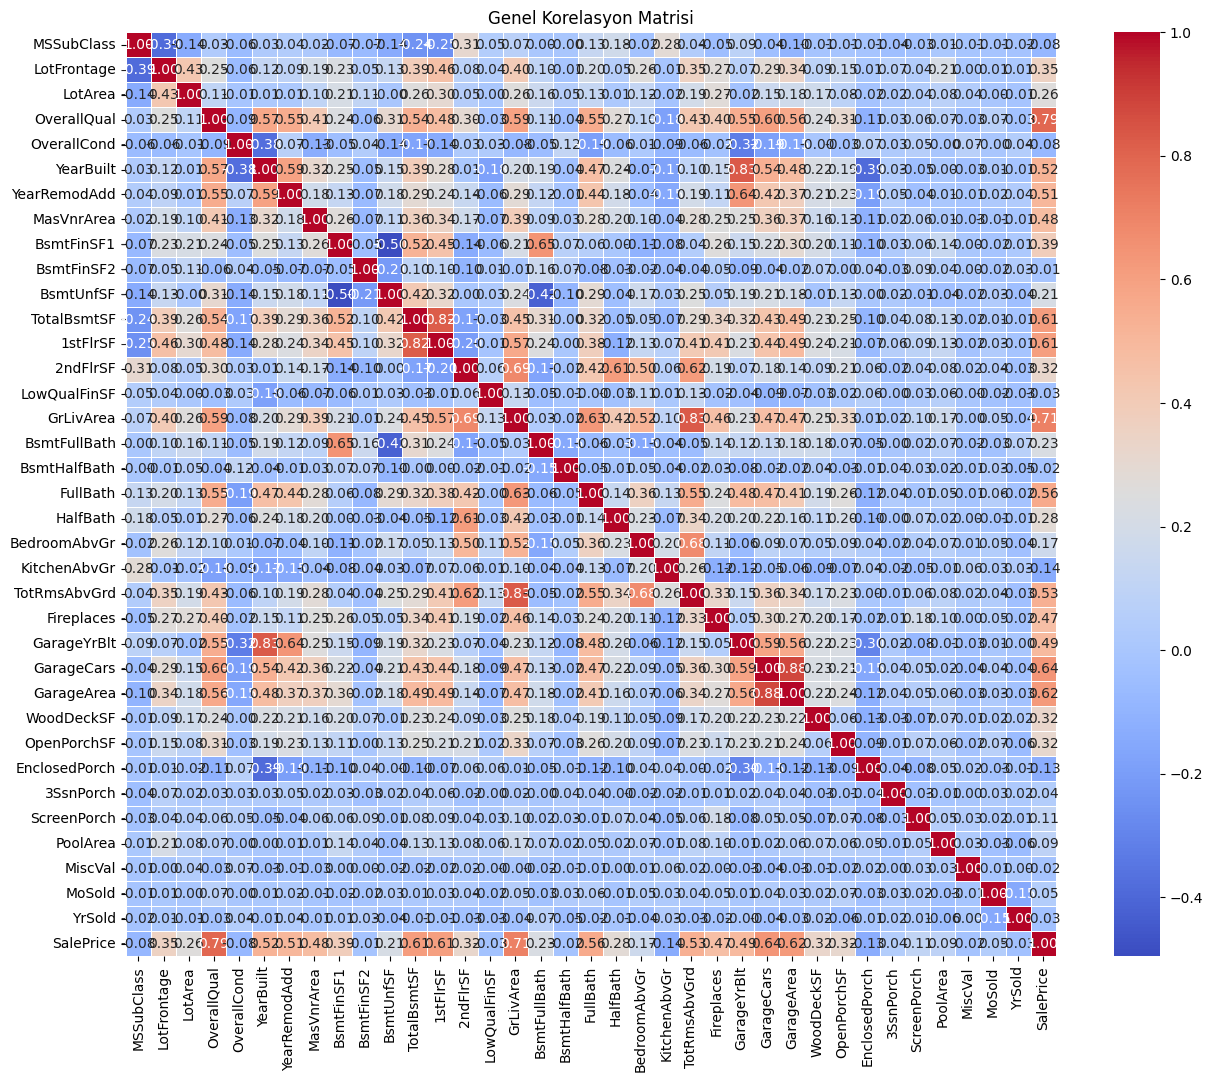

In [7]:

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Genel Korelasyon Matrisi")
plt.show()

In [8]:
delete_col = ["BsmtFinSF2","BsmtHalfBath","GarageYrBlt","OverallCond","TotalBsmtSF","LowQualFinSF","GarageCars","3SsnPorch","MiscVal"]
train_df.drop(delete_col , axis = 1 , inplace = True)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [10]:
cat_col = train_df.select_dtypes(include = ["object"]).columns
sayac = 0
for col in cat_col:
    sayac = sayac + 1
    print(f"{sayac}-{col}: {train_df[col].nunique()} farklı değer ")

1-MSZoning: 5 farklı değer 
2-Street: 2 farklı değer 
3-LotShape: 4 farklı değer 
4-LandContour: 4 farklı değer 
5-Utilities: 2 farklı değer 
6-LotConfig: 5 farklı değer 
7-LandSlope: 3 farklı değer 
8-Neighborhood: 25 farklı değer 
9-Condition1: 9 farklı değer 
10-Condition2: 8 farklı değer 
11-BldgType: 5 farklı değer 
12-HouseStyle: 8 farklı değer 
13-RoofStyle: 6 farklı değer 
14-RoofMatl: 8 farklı değer 
15-Exterior1st: 15 farklı değer 
16-Exterior2nd: 16 farklı değer 
17-MasVnrType: 3 farklı değer 
18-ExterQual: 4 farklı değer 
19-ExterCond: 5 farklı değer 
20-Foundation: 6 farklı değer 
21-BsmtQual: 4 farklı değer 
22-BsmtCond: 4 farklı değer 
23-BsmtExposure: 4 farklı değer 
24-BsmtFinType1: 6 farklı değer 
25-BsmtFinType2: 6 farklı değer 
26-Heating: 6 farklı değer 
27-HeatingQC: 5 farklı değer 
28-CentralAir: 2 farklı değer 
29-Electrical: 5 farklı değer 
30-KitchenQual: 4 farklı değer 
31-Functional: 7 farklı değer 
32-GarageType: 6 farklı değer 
33-GarageFinish: 3 farklı de

In [11]:
low_variance = []
for col in cat_col:
    most_freq_ratio = train_df[col].value_counts(normalize=True).iloc[0]
    if most_freq_ratio > 0.90:
        low_variance.append(col)
print(low_variance)
train_df.drop(low_variance , axis = 1 , inplace = True)
train_df.info()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle     

# Missing Value

In [12]:
print("-----Isnull-----")
print(train_df.isnull().sum())
print("-----Info-----")
print(train_df.info())

-----Isnull-----
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtUnfSF          0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType        81
GarageFinish      81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch      

In [13]:
bos_deger = ["LotFrontage" , "MasVnrType","MasVnrArea","BsmtQual" , "BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish"]

for col in bos_deger:
    print(f"----------{col} Unique Değerler----------")
    print(f"{col}: {train_df[col].nunique()} benzersiz değer")
    print()
    print(f"----------{col} ilk 5 değer----------")
    print(f"{col}: {train_df[col].head(5)}")
    print()
    print(f"----------{col} Değerlerin Sayısı----------")
    print(f"{col}: {train_df[col].value_counts()}")
    print()
    print(f"----------{col} Boş Değerler----------")
    print(f"{col}: {train_df[col].isnull().sum()}")
    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------")

----------LotFrontage Unique Değerler----------
LotFrontage: 110 benzersiz değer

----------LotFrontage ilk 5 değer----------
LotFrontage: 0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

----------LotFrontage Değerlerin Sayısı----------
LotFrontage: LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64

----------LotFrontage Boş Değerler----------
LotFrontage: 259
----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------------------------------------------------------------------------
----------MasVnrType Unique Değerler----------
MasVnrType: 3 benzersiz değer

----------MasVnrType ilk 5 değer----------
MasVnrType: 0    BrkFace
1        NaN
2    BrkFace
3        NaN
4    BrkFace
Name: MasVnrType, dtype: ob

In [14]:
print(train_df[["GarageType" , "GarageFinish"]].isnull().value_counts())
train_df[["GarageType" , "GarageFinish"]] = train_df[["GarageType" , "GarageFinish"]].fillna("NoNe")
print(train_df[["GarageType" , "GarageFinish"]].isnull().value_counts())

GarageType  GarageFinish
False       False           1379
True        True              81
Name: count, dtype: int64
GarageType  GarageFinish
False       False           1460
Name: count, dtype: int64


In [15]:
train_df.drop("BsmtFinType2" , axis = 1 , inplace = True)
bodrum = ["BsmtQual","BsmtExposure","BsmtFinType1"]

all_null = train_df[bodrum].isnull().all(axis = 1)
train_df.loc[all_null , bodrum] = "NoNe"

for col in bodrum:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

train_df[bodrum].isnull().sum()

BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
dtype: int64

In [16]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].median())
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].median())
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

# Outlier

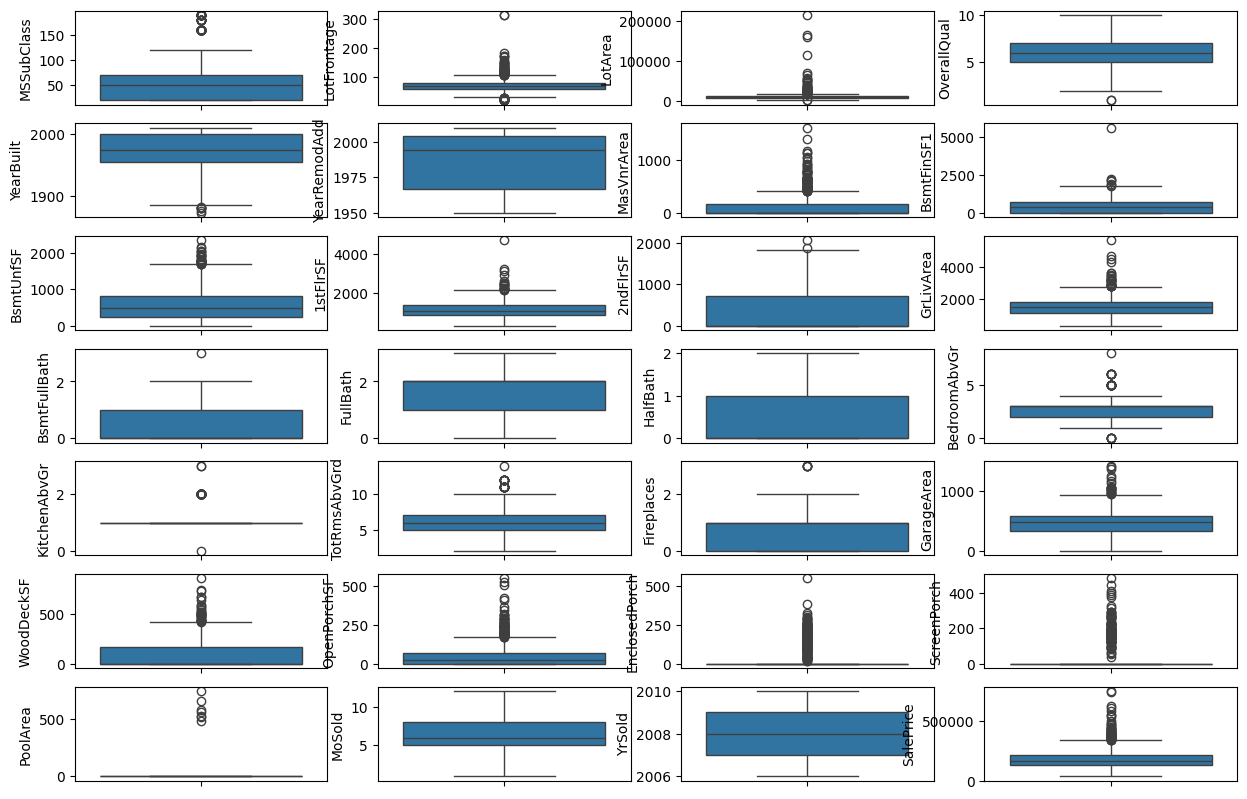

In [17]:
num_col = train_df.select_dtypes(include=[np.number]).columns
fig , axes = plt.subplots(7,4,figsize= (15,10))
for idx , col in  enumerate(num_col):
    i = idx // 4
    j = idx %  4 
    sns.boxplot(ax = axes[i,j] , data = train_df , y = col)
    
        
    

### IQR

In [18]:
def iqr_analiz(carpan):
    print(f"---------------------------------------- {carpan} ÇARPANIYLA ANALİZ ----------------------------------------" )
    for col in num_col:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        ust_sinir  = Q3 + (carpan * IQR)
        alt_sinir  = Q1 - (carpan * IQR)

        outlier_sayisi = len(train_df[(train_df[col] > ust_sinir) | (train_df[col] < alt_sinir)])
        print(f"-----{col} Analizi-----")
        print(f"Üst Sınır: {ust_sinir}")
        print(f"Alt Sınır: {alt_sinir}")
        print(f"Outlier Sayısı: {outlier_sayisi}")
        print(f"Değerler Toplamı: {train_df[col].value_counts()}")
        print(f"Unique Değerler: {train_df[col].nunique()}")
iqr_analiz(3)
iqr_analiz(1.5)

#Sayısal olarak kodlanmış kategorikler --> MSSubClass , OverallQual , BsmtFullBath , FullBath ,HalfBath , BedroomAbvGr , KitchenAbvGr , TotRmsAbvGrd ,FirePlaces
#Üst sınıra eşitlenecekler --> LotFrontage = 136 , LotArea = 23745 , BsmtFinSF1 = 2849 ,1stFlrSF = 2919.0 , GrLivArea = 3718.5 , GarageArea = 1300.5,WoodDeckSF = 672.0 , OpenPorchSF =272.0 , SalePrice = 466075.0 ,MasVnrArea=657.0
#IQR 0 olanlar --> EnclosedPorch , ScreenPorch , PoolArea

---------------------------------------- 3 ÇARPANIYLA ANALİZ ----------------------------------------
-----MSSubClass Analizi-----
Üst Sınır: 220.0
Alt Sınır: -130.0
Outlier Sayısı: 0
Değerler Toplamı: MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
Unique Değerler: 15
-----LotFrontage Analizi-----
Üst Sınır: 136.0
Alt Sınır: 3.0
Outlier Sayısı: 16
Değerler Toplamı: LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64
Unique Değerler: 110
-----LotArea Analizi-----
Üst Sınır: 23745.5
Alt Sınır: -4590.5
Outlier Sayısı: 34
Değerler Toplamı: LotArea
7200     25
9600     24
6000     17
10800    14
8400     14
         ..
10652     1
12968     1
11924     1
14260     1
9550      1
Name: count, Length: 

In [19]:
def baskilama (train_df,sutun , ust_sinir):
    train_df.loc[train_df[sutun] > ust_sinir , sutun] = ust_sinir
    return train_df
def silme (train_df , sutun , ust_sinir):
    train_df = train_df[train_df[sutun] <= ust_sinir]
    return train_df

satir_silinecekler = { "SalePrice" : 466075 ,
                       "BsmtFinSF1" : 2849
}
satir_baskilanacaklar = {"LotFrontage" : 136 ,
                         "LotArea" : 23745 ,
                         "1stFlrSF" : 2919 ,
                         "GrLivArea" : 3719 ,
                         "GarageArea" : 1301 ,
                         "WoodDeckSF" : 672 ,
                         "OpenPorchSF" : 272 ,
                         "MasVnrArea" : 657.0
}

for i , j in satir_silinecekler.items():
    train_df = silme(train_df ,i ,j)
for i , j in satir_baskilanacaklar.items():
    train_df = baskilama(train_df , i, j)
